In [ ]:
#Libraries for importing files/building models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Red_wine_quality.csv')
df2 = pd.read_csv('/content/drive/MyDrive/White_wine_quality.csv')



In [ ]:
datasets = [df1, df2]
df = pd.concat(datasets)


df.shape

(6497, 12)

In [ ]:
#df1.shape
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525473,115.744728,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749313,56.521751,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Removing outliers
##  Outliers are data points located too far away from the normal range (e.g., too far away from means)
# Checking for outliers in the data and removing if any

def remove_outlier(df, col_name):
    ## getting ready for plotting left-side figures!
    plt.figure(figsize=(40,40))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(data = df,x = col_name, ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)

    ## for marking 25% and 75% percentiles to be shown in plots
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1     ## IQR stands for the difference between Q1 and Q3

    ##  remove all the outliers
    ##    - those less than Q1-1.5*IQR are removed
    ##    - those greater than Q3+1.5IQR are removed
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

    ##  plotting the boxplots for the right-side plots (without outliers)
    sns.boxplot(data = df, x = col_name, ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    plt.show()
    return df

<Figure size 4000x4000 with 0 Axes>

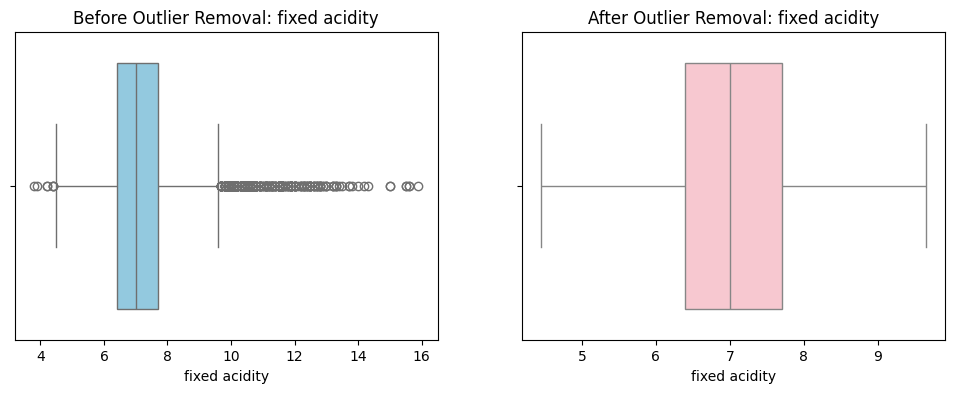

<Figure size 4000x4000 with 0 Axes>

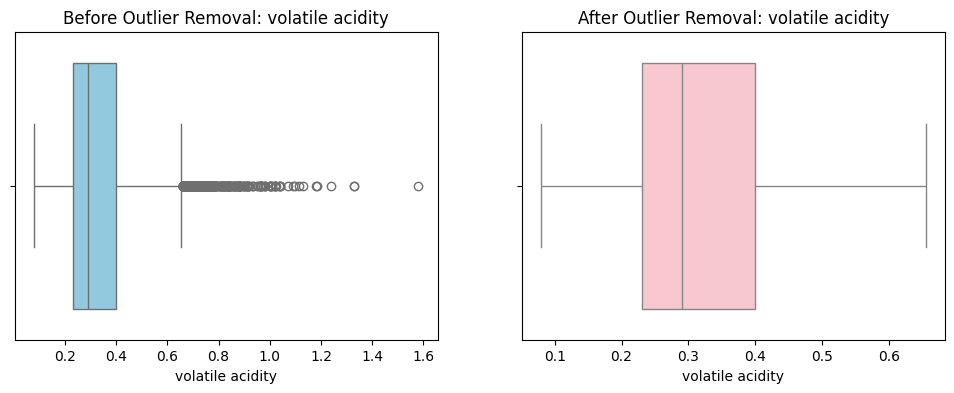

<Figure size 4000x4000 with 0 Axes>

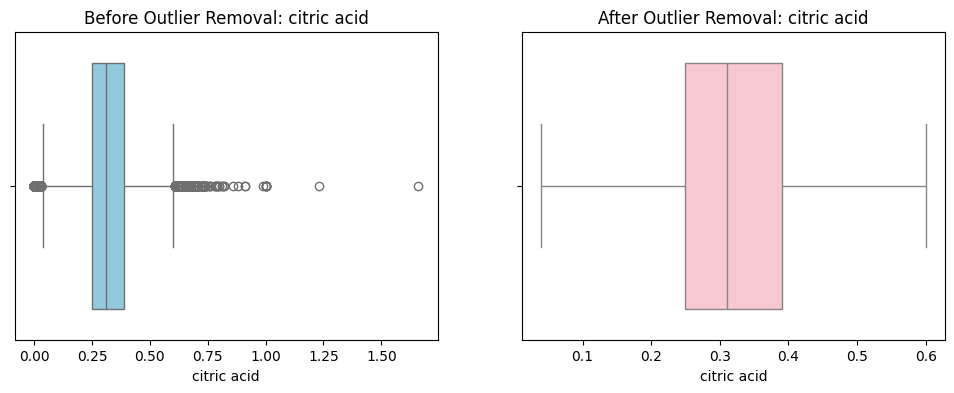

<Figure size 4000x4000 with 0 Axes>

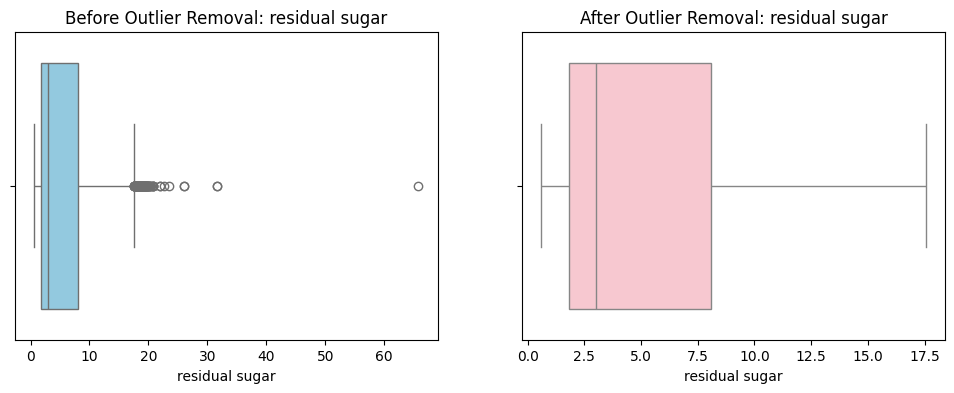

<Figure size 4000x4000 with 0 Axes>

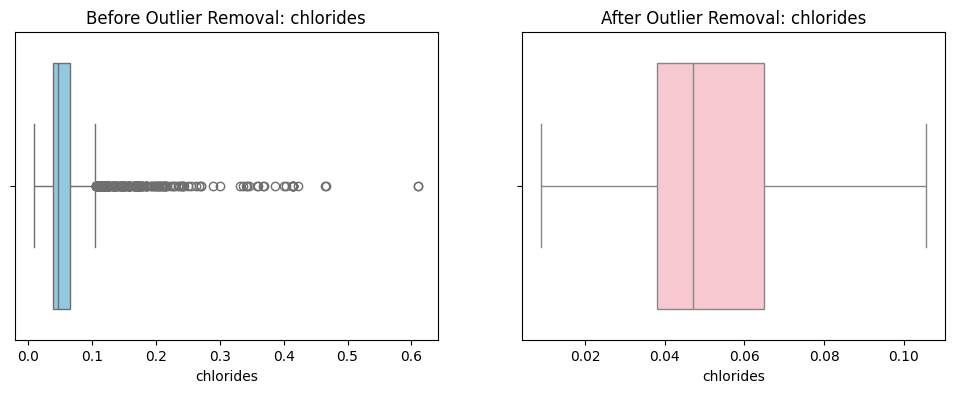

<Figure size 4000x4000 with 0 Axes>

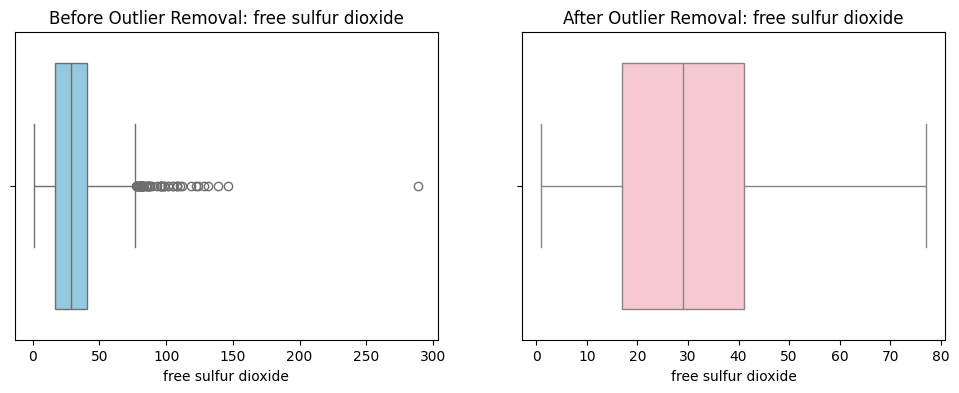

<Figure size 4000x4000 with 0 Axes>

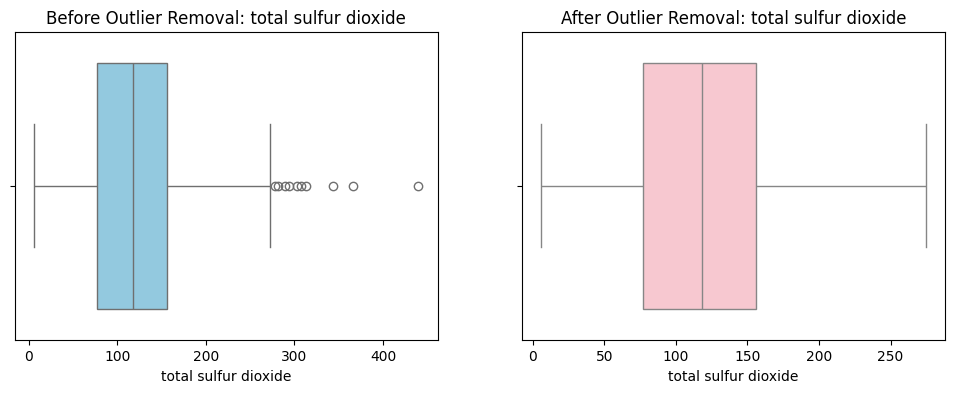

<Figure size 4000x4000 with 0 Axes>

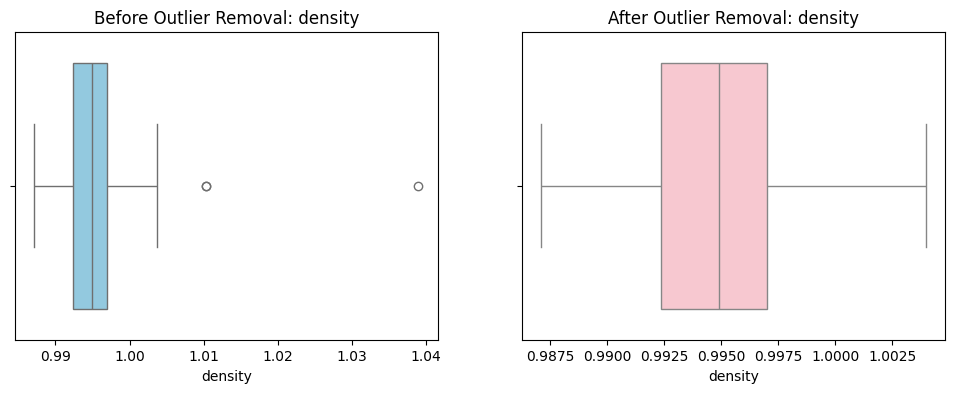

<Figure size 4000x4000 with 0 Axes>

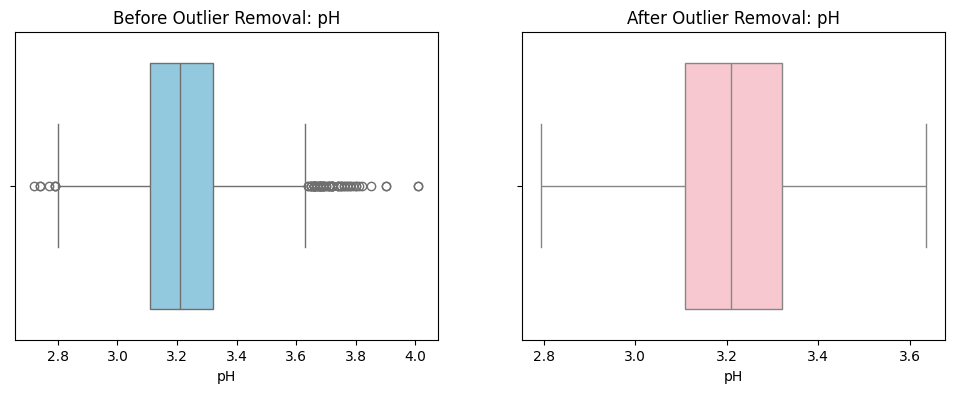

<Figure size 4000x4000 with 0 Axes>

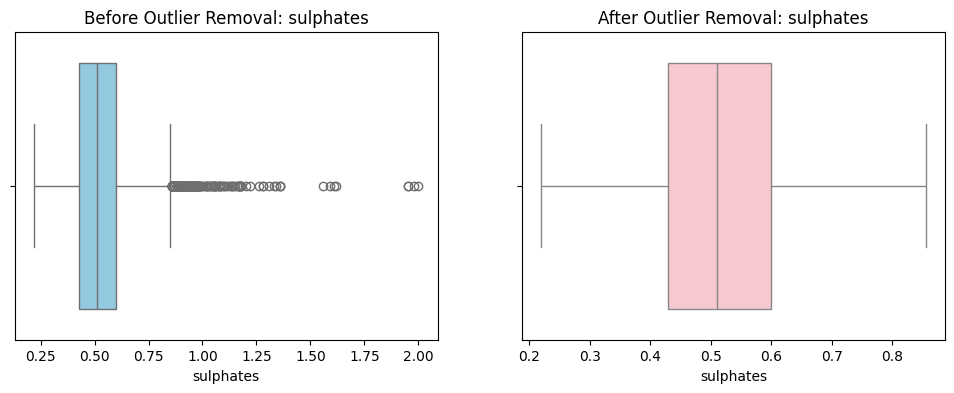

<Figure size 4000x4000 with 0 Axes>

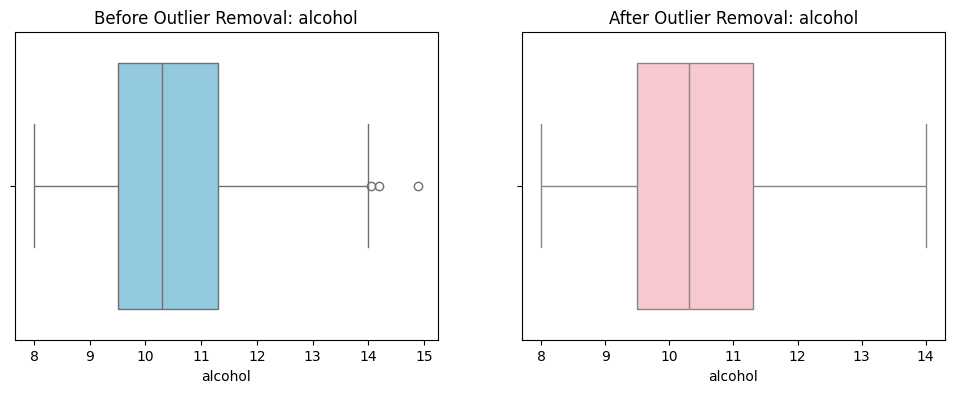

<Figure size 4000x4000 with 0 Axes>

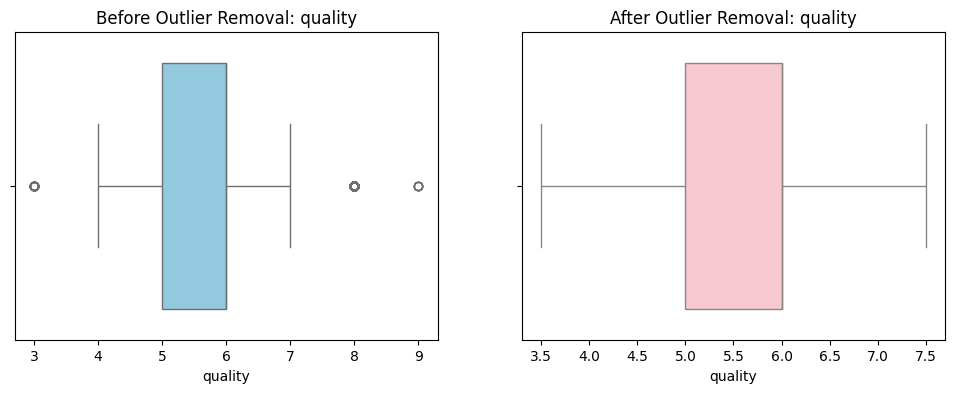

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

for col in df.columns:
    df = remove_outlier(df,col)
plt.show()


In [ ]:
df.shape

(6497, 12)

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.80,0.655,0.04,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.80,0.655,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,9.65,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.40,0.655,0.04,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.90,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.30,0.650,0.04,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.80,0.580,0.04,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.50,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


In [ ]:
df['quality'] = df['quality'].astype(int)

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 3])

In [ ]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1277
4     216
3      30
Name: count, dtype: int64

In [ ]:
df['Wine Quality'] = df['quality'].apply(lambda x:'High quality'if x > 6 else 'Low quality' )


In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Quality
0,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low quality
1,7.80,0.655,0.04,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low quality
2,7.80,0.655,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low quality
3,9.65,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Low quality
4,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low quality
5,7.40,0.655,0.04,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low quality
6,7.90,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Low quality
7,7.30,0.650,0.04,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,High quality
8,7.80,0.580,0.04,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,High quality
9,7.50,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Low quality


In [ ]:
df['Wine_Quality'] = df['Wine Quality'].apply(lambda x: 1 if x == 'High quality' else 0 )

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Quality,Wine_Quality
0,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low quality,0
1,7.80,0.655,0.04,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low quality,0
2,7.80,0.655,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low quality,0
3,9.65,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Low quality,0
4,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low quality,0
5,7.40,0.655,0.04,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low quality,0
6,7.90,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Low quality,0
7,7.30,0.650,0.04,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,High quality,1
8,7.80,0.580,0.04,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,High quality,1
9,7.50,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Low quality,0


In [ ]:
df.drop(columns = ['quality', 'Wine Quality'],inplace = True)

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Wine_Quality
0,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.80,0.655,0.04,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.80,0.655,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,9.65,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.40,0.655,0.04,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.40,0.655,0.04,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.90,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.30,0.650,0.04,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.80,0.580,0.04,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.50,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
df['Wine_Quality'].value_counts()

Wine_Quality
0    5220
1    1277
Name: count, dtype: int64

In [ ]:
print(f'Percentage of Low quality instances : {len(df.loc[df["Wine_Quality"]==0])/len(df["Wine_Quality"])*100}')
print(f'Percentage of High quality instances : {len(df.loc[df["Wine_Quality"]==1])/len(df["Wine_Quality"])*100}')

Percentage of Low quality instances : 80.3447745113129
Percentage of High quality instances : 19.655225488687087


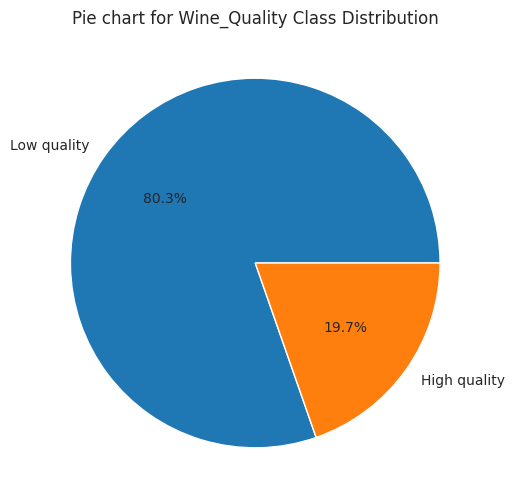

In [ ]:
sns.set_style("whitegrid")
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(x = df['Wine_Quality'].value_counts(), autopct='%1.1f%%', labels=['Low quality', 'High quality'])
plt.title('Pie chart for Wine_Quality Class Distribution')
plt.show()

In [ ]:
# Scaling the x_feature
features = df.drop('Wine_Quality', axis=1)  # Exclude the target variable
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X = features_scaled
y = df['Wine_Quality'].values

In [ ]:
# Handling Data Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5)
X_res, y_res = smote.fit_resample(X, y)

# 'X' and 'y' are labels before SMOTE
# 'X_res' and 'y_res' labels after SMOTE
counter_before = Counter(y)
counter_after = Counter(y_res)

print(counter_before)
print(counter_after)



Counter({0: 5220, 1: 1277})
Counter({0: 5220, 1: 5220})


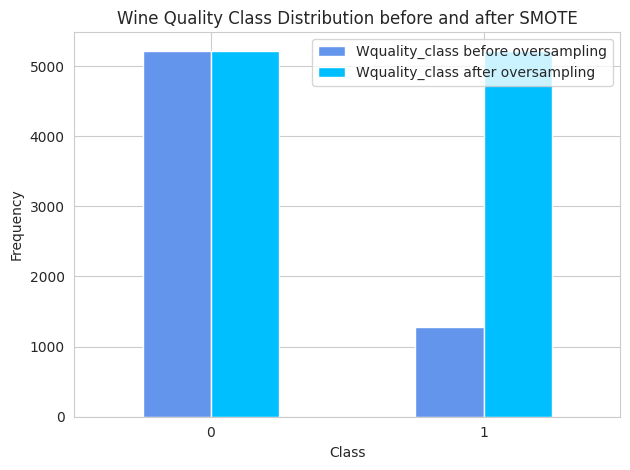

In [ ]:
# Handling data balancing with SMOTE
df_smote = pd.DataFrame({'Wquality_class before oversampling': counter_before, 'Wquality_class after oversampling': counter_after})

bar_colors = ['cornflowerblue', 'deepskyblue']

# Creating a bar plot
df_smote.plot(kind='bar', color = bar_colors)

plt.title('Wine Quality Class Distribution before and after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=360)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#spliting the data

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# XGboost Model begins here

In [ ]:
# Intialize the XGBoost classifier
xgb_clf = XGBClassifier()


# Hyperparameter Tuning for xgboost Optimization

In [ ]:
#import numpy as np
#from sklearn.model_selection import RandomizedSearchCV

# Defining the parameters for tuning
params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

# Using RandomizedSearchCV techniques
xgb_model = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

# Model fitting
xgb_model.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', xgb_model.best_params_)




Best hyperparameters: {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [ ]:
# Rebuild the classifier with the best hyperparameters
best_clf = xgb_model.best_estimator_

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1_Score: {f1:.4f}')
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

print(classification_report(y_test,y_pred))

Accuracy: 0.9397
F1_Score: 0.9397
Precision: 0.9402
Recall: 0.9397
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1075
           1       0.92      0.95      0.94      1013

    accuracy                           0.94      2088
   macro avg       0.94      0.94      0.94      2088
weighted avg       0.94      0.94      0.94      2088



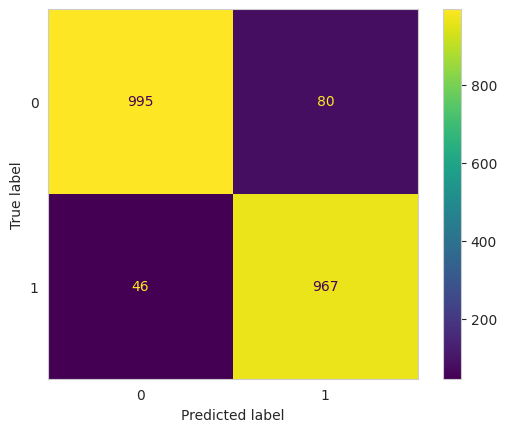

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Area under the Curve : AUC-ROC


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted class probabilities for the test set
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

#Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.9835827268761909

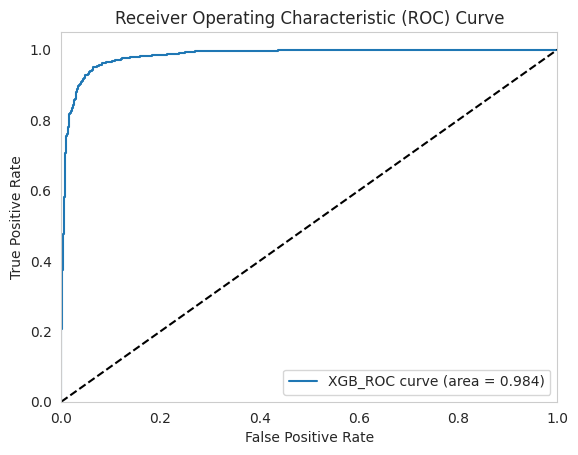

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='XGB_ROC curve (area = %0.3f)' % roc_auc)

# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

In [ ]:
import numpy as np

importances = best_clf.feature_importances_

# Sorting feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extracting feature labels
feature_labels = features.columns

# Printing sorted feature importances
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[sorted_indices[f]], importances[sorted_indices[f]]))

 1) alcohol                        0.234438
 2) volatile acidity               0.110624
 3) density                        0.091430
 4) citric acid                    0.078291
 5) total sulfur dioxide           0.076551
 6) chlorides                      0.074496
 7) residual sugar                 0.073540
 8) fixed acidity                  0.070235
 9) pH                             0.065607
10) sulphates                      0.063453
11) free sulfur dioxide            0.061335


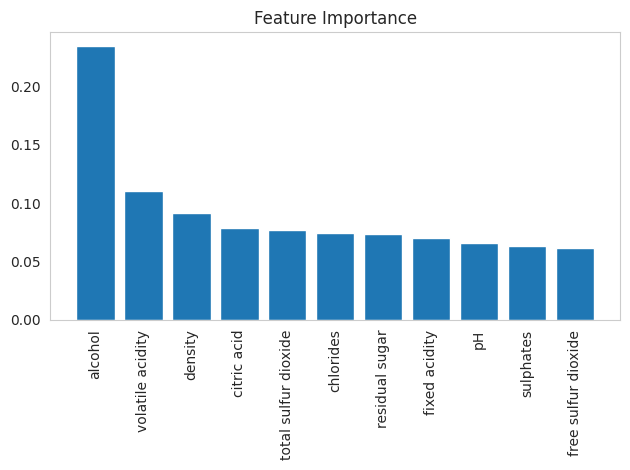

In [ ]:
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[sorted_indices], rotation=90)

plt.tight_layout()
plt.show()